In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Predicted Accuracies Graphs

In [70]:
path = '/Users/andrew/Documents/CogSci Thesis/yr_2-alt-with-dom_data/model_predictions/all_yr_predictions.csv'
yr_preds = pd.read_csv(path)

path = '/Users/andrew/Documents/CogSci Thesis/mixed_2-alt-with-dom_data/model_predictions/all_mixed_predictions.csv'
mixed_preds = pd.read_csv(path)

all_preds = pd.concat([yr_preds, mixed_preds])
display(all_preds)

,Unnamed: 0,participant,experimentPart,observed_acc,observed_acc_std,pop_acc,sum_acc,std_pop_acc,std_sum_acc,ttest_pop_ver_obs,ttest_sum_ver_obs
0,0,10,Yeon-Rahnev,0.773333,0.419235,0.77518,0.71684,0.417466,0.450536,9.318645e-01,1.534133e-02
1,1,11,Yeon-Rahnev,0.895561,0.306229,0.80517,0.75473,0.396072,0.430249,8.157758e-06,1.564113e-10
2,2,12,Yeon-Rahnev,0.850785,0.356767,0.75612,0.70337,0.429423,0.456774,1.687110e-05,2.981507e-10
3,3,13,Yeon-Rahnev,0.809896,0.392895,0.75656,0.68937,0.429161,0.462754,1.503993e-02,3.461271e-07
4,4,14,Yeon-Rahnev,0.808399,0.394078,0.67623,0.62530,0.467916,0.484048,3.679381e-08,1.666692e-13
5,5,15,Yeon-Rahnev,0.866841,0.340191,0.74166,0.68352,0.437724,0.465105,2.272861e-08,1.312687e-14
6,6,16,Yeon-Rahnev,0.776316,0.417262,0.62859,0.58661,0.483184,0.492444,2.667091e-09,6.466315e-14
7,7,1,Yeon-Rahnev,0.906005,0.292203,0.85838,0.82167,0.348662,0.382792,7.595116e-03,1.657486e-05
8,8,3,Yeon-Rahnev,0.903646,0.295461,0.82484,0.76577,0.380106,0.423519,4.952555e-05,1.856202e-10
9,9,4,Yeon-Rahnev,0.898936,0.301815,0.86944,0.81182,0.336920,0.390858,9.007247e-02,1.582819e-05


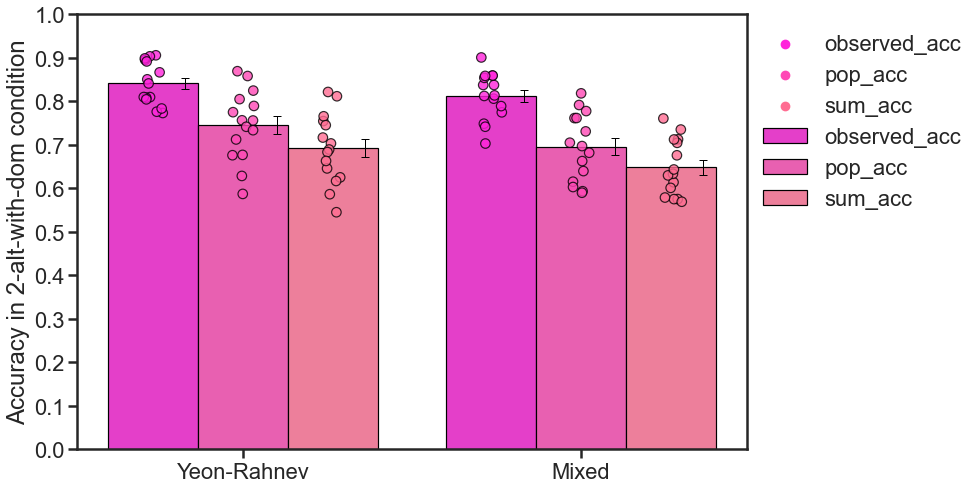

In [145]:
melted = pd.melt(all_preds, id_vars=['participant','experimentPart'], value_vars=['observed_acc','pop_acc','sum_acc'])

plt.figure(figsize=(12,8))
fig = sns.stripplot(
    data=melted, 
    x="experimentPart", 
    y='value', 
    hue='variable', 
    dodge=True, 
    alpha=0.8, 
    s=9.5, 
    edgecolor="black",
    linewidth=1.2,
)
sns.barplot(
    data=melted, 
    x='experimentPart', 
    y='value', 
    hue='variable', 
    capsize=0.05, 
    alpha=1,
    edgecolor="black",
    linewidth=1.2,
    ci=None,
)

plt.ylim(0, 1)
plt.yticks([round(x * 0.1, 11) for x in range(0, 11)])
fig.set_xlabel('')
fig.set_ylabel('Accuracy in 2-alt-with-dom condition')

sns.set_palette('spring')
sns.set_style('white')
sns.set_context('poster')
plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1.05, 0.8, 0.3, 0.2))

n=1

filter1 = all_preds['experimentPart'] == 'Yeon-Rahnev'
yerr = all_preds[filter1]['observed_acc'].sem()
y_pos = all_preds[filter1]['observed_acc'].mean()
plt.errorbar(x=-0.17, y=y_pos, yerr=yerr, color='black', capsize=4, elinewidth=n)

filter1 = all_preds['experimentPart'] == 'Yeon-Rahnev'
yerr = all_preds[filter1]['pop_acc'].sem()
y_pos = all_preds[filter1]['pop_acc'].mean()
plt.errorbar(x=0.1, y=y_pos, yerr=yerr, color='black', capsize=4, elinewidth=n)

filter1 = all_preds['experimentPart'] == 'Yeon-Rahnev'
yerr = all_preds[filter1]['sum_acc'].sem()
y_pos = all_preds[filter1]['sum_acc'].mean()
plt.errorbar(x=0.36, y=y_pos, yerr=yerr, color='black', capsize=4, elinewidth=n)

filter1 = all_preds['experimentPart'] == 'Mixed'
yerr = all_preds[filter1]['observed_acc'].sem()
y_pos = all_preds[filter1]['observed_acc'].mean()
plt.errorbar(x=0.83, y=y_pos, yerr=yerr, color='black', capsize=4, elinewidth=n)

filter1 = all_preds['experimentPart'] == 'Mixed'
yerr = all_preds[filter1]['pop_acc'].sem()
y_pos = all_preds[filter1]['pop_acc'].mean()
plt.errorbar(x=1.1, y=y_pos, yerr=yerr, color='black', capsize=4, elinewidth=n)

filter1 = all_preds['experimentPart'] == 'Mixed'
yerr = all_preds[filter1]['sum_acc'].sem()
y_pos = all_preds[filter1]['sum_acc'].mean()
plt.errorbar(x=1.36, y=y_pos, yerr=yerr, color='black', capsize=4, elinewidth=n)

plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True


## Import Likelihood Data

In [123]:
path = '/Users/andrew/Documents/CogSci Thesis/yr_4-alt_data/model_fitting/log_likelihoods.csv'
yr_likelihoods = pd.read_csv(path)

path = '/Users/andrew/Documents/CogSci Thesis/mixed_4-alt_data/model_fitting/log_likelihoods.csv'
mixed_likelihoods = pd.read_csv(path)
display(mixed_likelihoods)

yr_likelihoods['experimentPart'] = 'Yeon-Rahnev'
mixed_likelihoods['experimentPart'] = 'Mixed'

all_likelihoods = pd.concat([yr_likelihoods, mixed_likelihoods])
display(all_likelihoods)

,Unnamed: 0,participant,population_log_likelihood,summary_log_likelihood,n_2-alt-with-dom_trials,pop_log_likelihood/n,sum_log_likelihood/n
0,0,10.0,-349.253381,-327.399854,192.0,-1.819028,-1.705208
1,1,11.0,-422.064906,-358.138279,191.0,-2.209764,-1.875070
2,2,12.0,-411.732344,-364.470281,192.0,-2.144439,-1.898283
3,3,13.0,-316.481260,-292.375972,191.0,-1.656970,-1.530764
4,4,14.0,-372.389985,-345.552227,191.0,-1.949686,-1.809174
5,5,15.0,-358.684520,-332.459161,191.0,-1.877929,-1.740624
6,6,16.0,-314.417054,-290.154294,191.0,-1.646163,-1.519132
7,7,1.0,-447.767251,-369.588530,192.0,-2.332121,-1.924940
8,8,3.0,-430.170784,-382.814617,192.0,-2.240473,-1.993826
9,9,4.0,-290.880101,-265.156374,182.0,-1.598242,-1.456903


,Unnamed: 0,participant,population_log_likelihood,summary_log_likelihood,n_2-alt-with-dom_trials,pop_log_likelihood/n,sum_log_likelihood/n,experimentPart
0,0,10.0,-748.757837,-650.121957,375.0,-1.996688,-1.733659,Yeon-Rahnev
1,1,11.0,-912.375356,-765.868091,383.0,-2.382181,-1.999656,Yeon-Rahnev
2,2,12.0,-811.360850,-721.558602,382.0,-2.123981,-1.888897,Yeon-Rahnev
3,3,13.0,-772.199193,-690.625460,384.0,-2.010935,-1.798504,Yeon-Rahnev
4,4,14.0,-697.504527,-652.692089,381.0,-1.830721,-1.713103,Yeon-Rahnev
5,5,15.0,-813.431609,-733.006355,383.0,-2.123842,-1.913855,Yeon-Rahnev
6,6,16.0,-648.770037,-604.273722,380.0,-1.707290,-1.590194,Yeon-Rahnev
7,7,1.0,-1012.724603,-772.326814,383.0,-2.644190,-2.016519,Yeon-Rahnev
8,8,3.0,-949.110194,-774.882798,384.0,-2.471641,-2.017924,Yeon-Rahnev
9,9,4.0,-991.526560,-752.376661,376.0,-2.637039,-2.001002,Yeon-Rahnev


# AIC Graphs

<ErrorbarContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

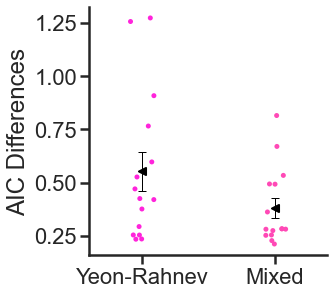

In [200]:
# all_likelihoods['aic_differences'] = all_likelihoods['population_log_likelihood']*(-2) - all_likelihoods['summary_log_likelihood']*(-2)
all_likelihoods['aic_differences'] = all_likelihoods['pop_log_likelihood/n']*(-2) - all_likelihoods['sum_log_likelihood/n']*(-2)

plt.figure()
fig = sns.catplot(data=all_likelihoods, x='experimentPart', y='aic_differences')
fig.set(ylabel='AIC Differences', xlabel='')
sns.set_palette('spring')
sns.set_style('white')
sns.set_context('poster')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Plot averages
yr_mean = all_likelihoods.groupby(['experimentPart']).mean()['aic_differences'].loc['Yeon-Rahnev']
mixed_mean = all_likelihoods.groupby(['experimentPart']).mean()['aic_differences'].loc['Mixed']
plt.scatter(0, yr_mean, marker='<', s=50, color='black')
plt.scatter(1, mixed_mean, marker='<', s=50, color='black')
plt.xlim(-0.4,1.4)

# Error bars
yr_std = all_likelihoods.groupby(['experimentPart']).sem()['aic_differences'].loc['Yeon-Rahnev']
mixed_std = all_likelihoods.groupby(['experimentPart']).sem()['aic_differences'].loc['Mixed']
plt.errorbar(x=0, y=yr_mean, yerr=yr_std, color='black', capsize=4, elinewidth=1)
plt.errorbar(x=1, y=mixed_mean, yerr=mixed_std, color='black', capsize=4, elinewidth=1)



In [178]:
all_likelihoods['aic_differences'] = all_likelihoods['pop_log_likelihood/n']*(-2) - all_likelihoods['sum_log_likelihood/n']*(-2)

yr_aics = all_likelihoods[all_likelihoods['experimentPart'] == 'Yeon-Rahnev']['aic_differences'].sort_values()
mixed_aics = all_likelihoods[all_likelihoods['experimentPart'] == 'Mixed']['aic_differences'].sort_values()

from scipy.stats import ttest_rel
print(ttest_rel(yr_aics, mixed_aics))



Ttest_relResult(statistic=3.7099035908521745, pvalue=0.0023311656199360873)
